# Cogs 109 Final Project G5

Member:


1.   列表项
2.   列表项
3. Xing Hong A15867895


**Research Question:**

Which of the given physical and economic factors -- 
1. Wholesale price index (WPI) of building materials for the base year[v13], 
2. Total floor area of the building [v2], 
3. Price of the unit at the beginning of the project per m^2 [v8], 
4. Total floor areas of building permits issued by the city/municipality [v14], 
5. Population of the city [v28], 
-- affect the sale price and actual construction price the most? 

In addition, how do a combination of these factors affect the actual sale price and actual construction cost?


## Data Description and Variables

Data set includes construction cost, sale prices, project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran.
We will collect our data on the repository of uci(download from a previously published dataset), a collection of real estate single-family residential apartments in Tehran, Iran. Link: http://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set

**Types of analysis:** Regression

## Importing Modules and Defining an Evaluation Table

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import folium
from folium.plugins import HeatMap
%matplotlib inline

In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

R^2 adjustment, since R^2 will increase if features increase. Adjusted R^2 only increases, if the addition of the variable reduces the MSE

In [ ]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

## Data Import


In [ ]:
#extract the data from the first sheet of the original excel 
#turn it into csv file
#make a dataframe df_RB_total from the csv file
df_RB_total = pd.read_csv('/content/research_data/Residential-Building-Data-1.csv')
df_RB_total.shape

(373, 109)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#create another dataframe df_RB_research that contains the columns that are useful for the research
df_RB_research = df_RB_total.loc[:,['PROJECT DATES (PERSIAN CALENDAR)','Unnamed: 1','Unnamed: 2',
                                    'Unnamed: 3','Unnamed: 5','Unnamed: 11',
                                    'Unnamed: 27','Unnamed: 29','OUTPUTS','Unnamed: 108']]
df_RB_research = df_RB_research.rename(columns = {'PROJECT DATES (PERSIAN CALENDAR)':"START YEAR",'Unnamed: 1':'START QUARTER',
                                                  'Unnamed: 2':"COMPLETION YEAR",'Unnamed: 3':'COMPLETION QUARTER',
                                                  'Unnamed: 5':'TOTAL FLOOR AERA OF THE BUILDING','Unnamed: 11':
                                                  'PRICE of the UNIT at the BEGINNING of the PROJECT per m^2',
                                                  'Unnamed: 27':'CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR',
                                                  'Unnamed: 29':'POPULATION of the CITY','OUTPUTS':'Actual sales prices (output)',
                                                  'Unnamed: 108':'Actual construction costs (output)'},)
df_RB_research

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,TOTAL FLOOR AERA OF THE BUILDING,PRICE of the UNIT at the BEGINNING of the PROJECT per m^2,"CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR",POPULATION of the CITY,Actual sales prices (output),Actual construction costs (output)
0,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-2,V-8,V-26,V-28,V-9,V-10
1,81.00,1.00,85.00,1.00,3150.00,1200.00,63.25,42587,2200.00,410.00
2,84.00,1.00,89.00,4.00,7600.00,2900.00,105.32,45966,5000.00,1000.00
3,78.00,1.00,81.00,4.00,4800.00,630.00,38.34,39066,1200.00,170.00
4,72.00,2.00,73.00,2.00,685.00,140.00,10.06,8435.75,165.00,30.00
...,...,...,...,...,...,...,...,...,...,...
368,83.00,4.00,86.00,1.00,1350.00,830.00,101.89,34474.5,1100.00,150.00
369,81.00,2.00,82.00,4.00,600.00,570.00,65.65,10927.5,740.00,80.00
370,84.00,4.00,86.00,3.00,1900.00,640.00,115.7,35322,860.00,220.00
371,82.00,3.00,84.00,4.00,510.00,790.00,82.89,22417.5,1100.00,110.00


In [ ]:
#create another dataframe df_RB_research that contains the columns that are useful for the research
#df_RB_research['PROJECT DATES (PERSIAN CALENDAR)'] = df_RB_total.loc[:,['PROJECT DATES (PERSIAN CALENDAR)']]
##df_RB_research

In [ ]:
df_RB_research.head(3)

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,TOTAL FLOOR AERA OF THE BUILDING,PRICE of the UNIT at the BEGINNING of the PROJECT per m^2,"CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR",POPULATION of the CITY,Actual sales prices (output),Actual construction costs (output)
0,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-2,V-8,V-26,V-28,V-9,V-10
1,81.00,1.00,85.00,1.00,3150.00,1200.00,63.25,42587,2200.00,410.00
2,84.00,1.00,89.00,4.00,7600.00,2900.00,105.32,45966,5000.00,1000.00


In [ ]:
#Do data cleaning
df_no_first_row = df_RB_research.drop(0).reset_index()
df_research = df_no_first_row.dropna()
df_research 


,index,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,TOTAL FLOOR AERA OF THE BUILDING,PRICE of the UNIT at the BEGINNING of the PROJECT per m^2,"CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR",POPULATION of the CITY,Actual sales prices (output),Actual construction costs (output)
0,1,81.00,1.00,85.00,1.00,3150.00,1200.00,63.25,42587,2200.00,410.00
1,2,84.00,1.00,89.00,4.00,7600.00,2900.00,105.32,45966,5000.00,1000.00
2,3,78.00,1.00,81.00,4.00,4800.00,630.00,38.34,39066,1200.00,170.00
3,4,72.00,2.00,73.00,2.00,685.00,140.00,10.06,8435.75,165.00,30.00
4,5,87.00,1.00,90.00,2.00,3000.00,5000.00,169.5,49572,5500.00,700.00
...,...,...,...,...,...,...,...,...,...,...,...
367,368,83.00,4.00,86.00,1.00,1350.00,830.00,101.89,34474.5,1100.00,150.00
368,369,81.00,2.00,82.00,4.00,600.00,570.00,65.65,10927.5,740.00,80.00
369,370,84.00,4.00,86.00,3.00,1900.00,640.00,115.7,35322,860.00,220.00
370,371,82.00,3.00,84.00,4.00,510.00,790.00,82.89,22417.5,1100.00,110.00


In [ ]:
# Convert string into values for use
df_search = df_research.values
# treat the data as array instead of an object
df_search = df_search.astype(np.float64)

## Data Visualization



In [ ]:
#plot a histagram of TOTAL FLOOR AERA OF THE BUILDING(v2)
total_floor = df_research["TOTAL FLOOR AERA OF THE BUILDING"]
f1 = sns.distplot(age, kde = False, bins = 25)
f1 = plt.gcf()

Bar, Box, Scatter, Scatter 3D, Heat map...

## Data Binning and cleaning out the outliers

## Covariance matrix on the 4 predictors we picked

In [ ]:
data = df_research.values
variable_matrix = data[:,5:9]
variable_matrix = variable_matrix.astype(np.float64)
mean1 = np.mean(variable_matrix[:,0])
mean2 = np.mean(variable_matrix[:,1])
mean3 = np.mean(variable_matrix[:,2])
mean4 = np.mean(variable_matrix[:,3])
mean = np.array([mean1, mean2, mean3, mean4])
sample_num = len(variable_matrix[:,0])

# zero-mean data matrix
Z = variable_matrix.T - np.tile(mean,[sample_num,1]).T
# covariance matrix
C = np.matmul(Z, Z.T)/(sample_num - 1)
C

array([[3.24854299e+06, 4.18768911e+05, 8.76318833e+03, 1.40040823e+06],
       [4.18768911e+05, 9.91669765e+05, 3.27373603e+04, 2.88229800e+06],
       [8.76318833e+03, 3.27373603e+04, 2.67639639e+03, 2.18811519e+05],
       [1.40040823e+06, 2.88229800e+06, 2.18811519e+05, 1.92393866e+08]])

### Pearson correlation matrix on the 4 predictors we picked

Where v2, v8, v26, v28 represent 0, 1, 2, 3, respectively.
Note that: 
V2: Total floor area of the building
v8: Price of the unit at the beginning of the project per m^2
v26: CPI of housing, water, fuel and power in the base year
v28: population of the city


,0,1,2,3
0,1.000000,0.233317,0.093982,0.056016
1,0.233317,1.000000,0.635455,0.208670
2,0.093982,0.635455,1.000000,0.304929
3,0.056016,0.208670,0.304929,1.000000


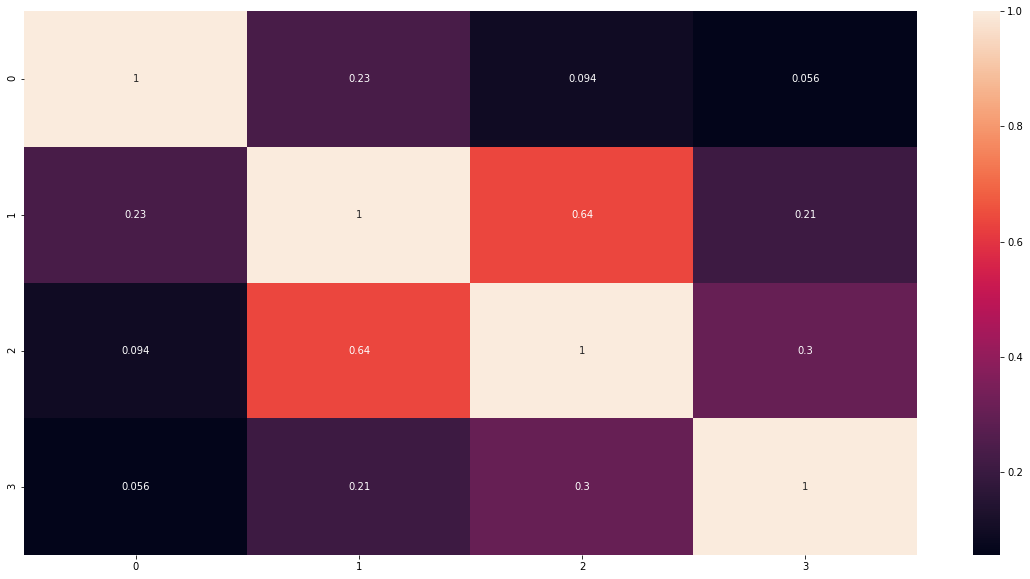

In [ ]:
# Simple heatmap on corr
plt.figure(figsize=(20, 10))
target = pd.DataFrame(variable_matrix)
corr = target.corr(method = 'pearson')
sns.heatmap(corr,  annot = True)
print('Where v2, v8, v26, v28 represent 0, 1, 2, 3, respectively.')
print('Note that: ')
print('V2: Total floor area of the building') 
print('v8: Price of the unit at the beginning of the project per m^2') 
print('v26: CPI of housing, water, fuel and power in the base year')
print('v28: population of the city')
corr

## Data Preprocessing: split into training and test data sets

In [ ]:
# shuffle and split data
df_values = df_research.values
df_train, df_test = train_test_split(df_values, test_size = 0.2, train_size = 0.8, shuffle = True)

## Univariate Regression

In [ ]:
# Note that the predictors involved are v2, v8, v26, v28
# and v9, 10 are used for regression
# V2: Total floor area of the building
# v8: Price of the unit at the beginning of the project per m^2
# v26: CPI of housing, water, fuel and power in the base year
# v28: population of the city
# v9(output): Actual sale prices
# v10(output): Actual construction costs
df_use = df_train

### Model 1: Actual Sale Price = w0 + w1*V2 where V2 is Total floor area of the building, and w0, w1 are the weights.

In [ ]:
v2_model_1 = df_use[:, 5]
Actual_Sale_Price_M1 = df_use[:, 9]

In [ ]:
## Create A, the augmented data array
X = v2_model_1 
X = X.astype(np.float64) # X was treated as an object and needed to be floats
Y = Actual_Sale_Price_M1
Y = np.array(Y)
Y = Y.astype(np.float64)

ones = np.ones([len(X), ], dtype = int)
A = np.vstack((ones, X))
A1 = A.transpose()
A1.shape

(297, 2)

In [ ]:
## Solve for w, the weight vector
ws = np.linalg.lstsq(A1, Y, rcond=None)[0]
ws

array([1.07230813e+03, 1.71334399e-01])

In [ ]:
print('Model1: Actual Sale Price = %f + %f * V2 ' % (ws[0], ws[1]))

Model1: Actual Sale Price = 1072.308127 + 0.171334 * V2 


### Model 2: Actual construction costs = w0 + w1*V2 where V2 is Total floor area of the building, and w0, w1 are the weights.

In [ ]:
v2_model_2 = df_use[:, 5]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X2 = v2_model_2 
X2 = X2.astype(np.float64) # X was treated as an object and needed to be floats
Y2 = Actual_construction_costs
Y2 = np.array(Y2)
Y2 = Y2.astype(np.float64)

ones2 = np.ones([len(X2), ], dtype = int)
A2 = np.vstack((ones2, X2))
A22 = A2.transpose()
A22.shape # 372 X 2
## Solve for w, the weight vector
ws2 = np.linalg.lstsq(A22, Y2, rcond=None)[0]
print('Model2: Actual construction costs = %f + %f * V2 ' % (ws2[0], ws2[1]))

Model2: Actual construction costs = 189.563721 + 0.022704 * V2 


### Model 3: Actual Sale Price = w0 + w1*V8 where V8 is Price of the unit at the beginning of the project per m^2, and w0, w1 are the weights.

In [ ]:
v8_model_3 = df_use[:, 6]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X3 = v8_model_3
X3 = X3.astype(np.float64) # X was treated as an object and needed to be floats
Y3 = Actual_Sale_Price
Y3 = np.array(Y3)
Y3 = Y3.astype(np.float64)

ones3 = np.ones([len(X3), ], dtype = int)
A3 = np.vstack((ones3, X3))
A33 = A3.transpose()
A33.shape # 372 X 2
## Solve for w, the weight vector
ws3 = np.linalg.lstsq(A33, Y3, rcond=None)[0]
print('Model3: Actual Sale Price = %f + %f * V8 ' % (ws3[0], ws3[1]))

Model3: Actual Sale Price = 116.338853 + 1.157924 * V8 


### Model 4: Actual construction costs = w0 + w1*V8 where V8 is Price of the unit at the beginning of the project per m^2, and w0, w1 are the weights.

In [ ]:
v8_model_4 = df_use[:, 6]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X4 = v8_model_4
X4 = X4.astype(np.float64) # X was treated as an object and needed to be floats
Y4 = Actual_construction_costs
Y4 = np.array(Y4)
Y4 = Y4.astype(np.float64)

ones4 = np.ones([len(X4), ], dtype = int)
A4 = np.vstack((ones4, X4))
A44 = A4.transpose()
A44.shape # 372 X 2
## Solve for w, the weight vector
ws4 = np.linalg.lstsq(A44, Y4, rcond=None)[0]
print('Model4: Actual construction costs = %f + %f * V8 ' % (ws4[0], ws4[1]))

Model4: Actual construction costs = 91.996348 + 0.126226 * V8 


### Model 5: Actual Sale Price = w0 + w1*V26 where V26 is CPI of housing, water, fuel and power in the base year, and w0, w1 are the weights.

In [ ]:
v26_model_5 = df_use[:, 7]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X5 = v26_model_5
X5 = X5.astype(np.float64) # X was treated as an object and needed to be floats
Y5 = Actual_Sale_Price
Y5 = np.array(Y5)
Y5 = Y5.astype(np.float64)

ones5 = np.ones([len(X5), ], dtype = int)
A5 = np.vstack((ones5, X5))
A55 = A5.transpose()
A55.shape # 372 X 2
## Solve for w, the weight vector
ws5 = np.linalg.lstsq(A55, Y5, rcond=None)[0]
print('Model5: Actual Sale Price = %f + %f * V26 ' % (ws5[0], ws5[1]))

Model5: Actual Sale Price = 167.972020 + 13.580072 * V26 


### Model 6: Actual construction costs = w0 + w1*V26 where V26 is CPI of housing, water, fuel and power in the base year, and w0, w1 are the weights.

In [ ]:
v26_model_6 = df_use[:, 7]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X6 = v26_model_6
X6 = X6.astype(np.float64) # X was treated as an object and needed to be floats
Y6 = Actual_construction_costs
Y6 = np.array(Y6)
Y6 = Y6.astype(np.float64)

ones6 = np.ones([len(X6), ], dtype = int)
A6 = np.vstack((ones6, X6))
A66 = A6.transpose()
A66.shape # 372 X 2
## Solve for w, the weight vector
ws6 = np.linalg.lstsq(A66, Y6, rcond=None)[0]
print('Model6: Actual construction costs = %f + %f * V26 ' % (ws6[0], ws6[1]))

Model6: Actual construction costs = 19.839798 + 2.370293 * V26 


### Model 7: Actual Sale Price = w0 + w1*V28 where V28 is population of the city, and w0, w1 are the weights.

In [ ]:
v28_model_7 = df_use[:, 8]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X7 = v28_model_7
X7 = X7.astype(np.float64) # X was treated as an object and needed to be floats
Y7 = Actual_Sale_Price
Y7 = np.array(Y7)
Y7 = Y7.astype(np.float64)

ones7 = np.ones([len(X7), ], dtype = int)
A7 = np.vstack((ones7, X7))
A77 = A7.transpose()
A77.shape # 372 X 2
## Solve for w, the weight vector
ws7 = np.linalg.lstsq(A77, Y7, rcond=None)[0]
print('Model7: Actual Sale Price = %f + %f * V28 ' % (ws7[0], ws7[1]))

Model7: Actual Sale Price = 790.775005 + 0.020161 * V28 


### Model 8: Actual construction costs = w0 + w1*V28 where V28 is population of the city, and w0, w1 are the weights.

In [ ]:
v28_model_8 = df_use[:, 8]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X8 = v28_model_8
X8 = X8.astype(np.float64) # X was treated as an object and needed to be floats
Y8 = Actual_construction_costs
Y8 = np.array(Y8)
Y8 = Y8.astype(np.float64)

ones8 = np.ones([len(X8), ], dtype = int)
A8 = np.vstack((ones8, X8))
A88 = A8.transpose()
A88.shape # 372 X 2
## Solve for w, the weight vector
ws8 = np.linalg.lstsq(A88, Y8, rcond=None)[0]
print('Model8: Actual construction costs = %f + %f * V28 ' % (ws8[0], ws8[1]))

Model8: Actual construction costs = 142.392272 + 0.003024 * V28 


### Graphs of Model 1 to Model 4

In [ ]:
M1_predict = ws[0] + ws[1] * X
M2_predict = ws2[0] + ws2[1] * X2
M3_predict = ws3[0] + ws3[1] * X3
M4_predict = ws4[0] + ws4[1] * X4

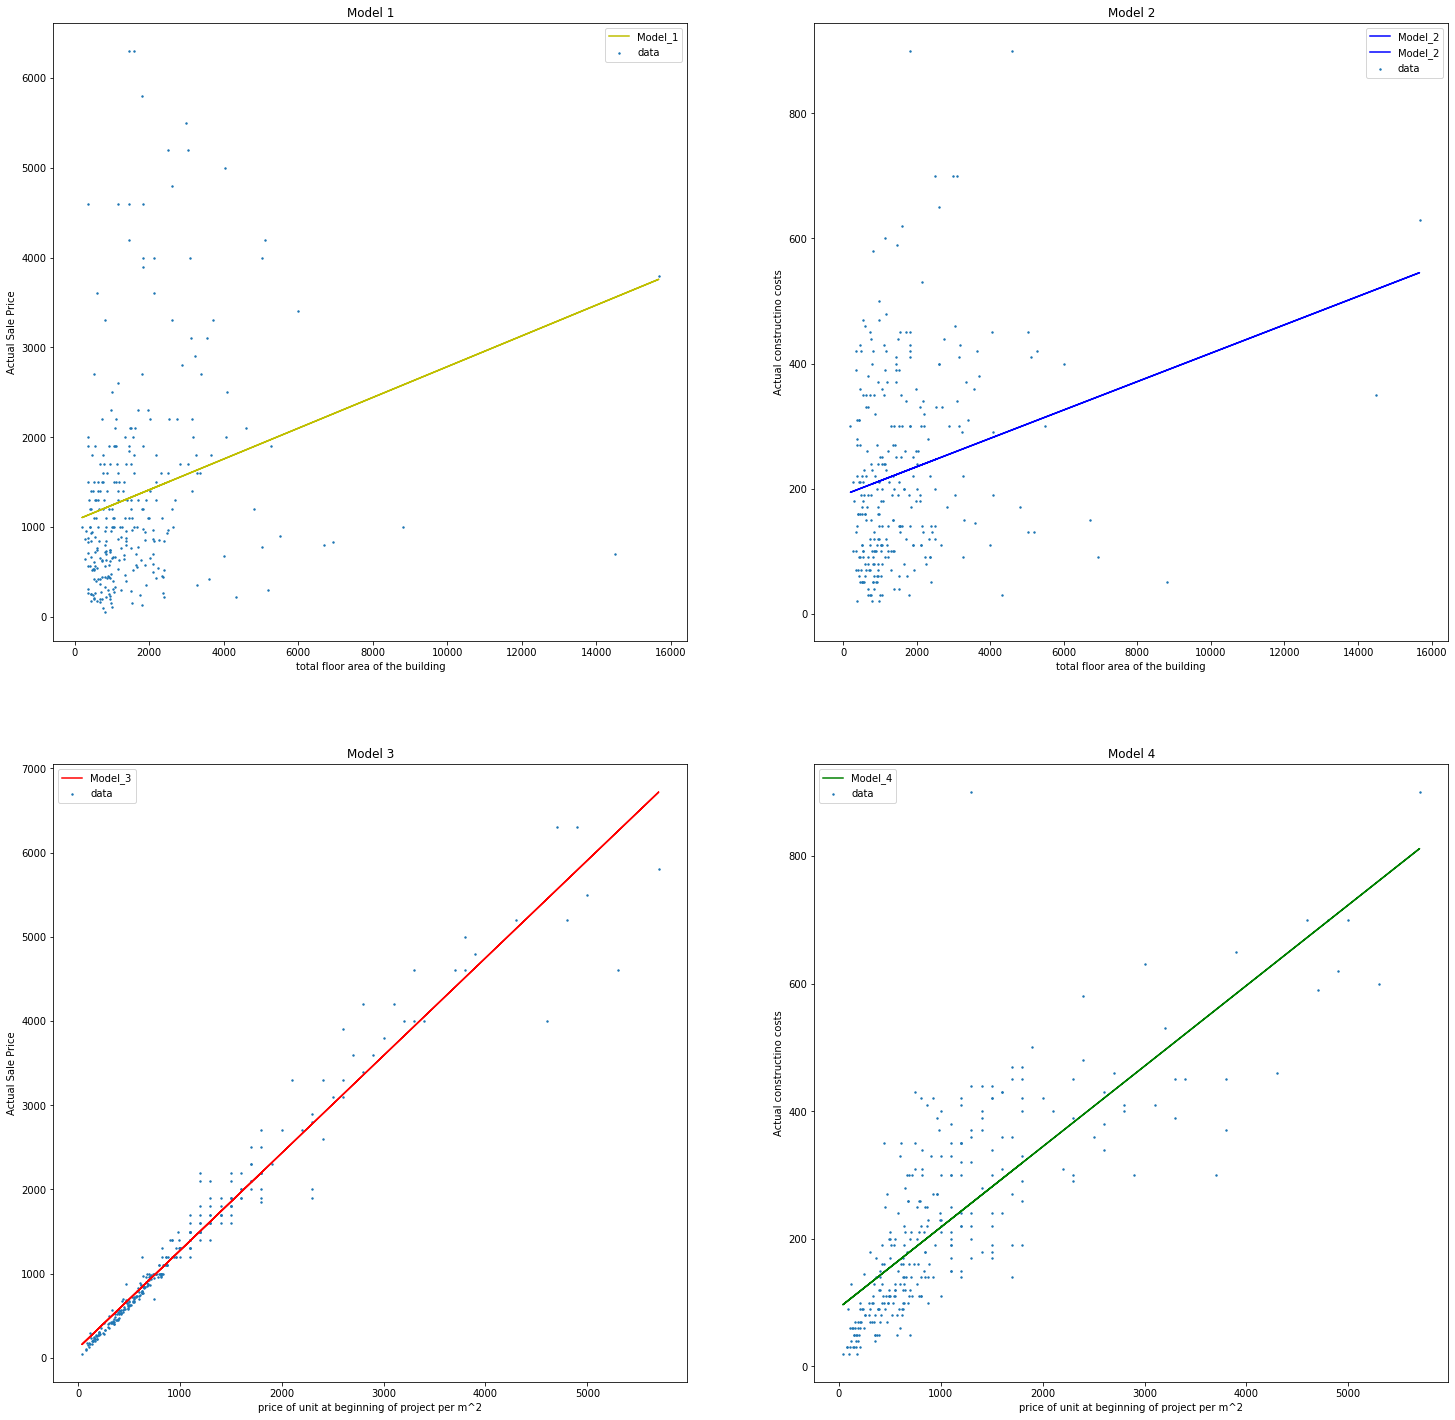

In [ ]:
fig1, axes1 = plt.subplots(2, 2, figsize=(25, 25))
# Model 1
axes1[0][0].scatter(X, Y, s = 2, label = 'data')
axes1[0][0].plot(X, M1_predict, color = 'y', label = 'Model_1')
axes1[0][0].set(xlabel = 'total floor area of the building', ylabel = 'Actual Sale Price', title = 'Model 1')
axes1[0][0].legend()
# Model 2
axes1[0][1].scatter(X2, Y2, s = 2, label = 'data')
axes1[0][1].plot(X2, M2_predict,2, color = 'b', label = 'Model_2')
axes1[0][1].set(xlabel = 'total floor area of the building', ylabel = 'Actual constructino costs', title = 'Model 2')
axes1[0][1].legend()
# Model 3
axes1[1][0].scatter(X3, Y3, s = 2, label = 'data')
axes1[1][0].plot(X3, M3_predict, color = 'r', label = 'Model_3')
axes1[1][0].set(xlabel = 'price of unit at beginning of project per m^2', ylabel = 'Actual Sale Price', title = 'Model 3')
axes1[1][0].legend()
# Model 4
axes1[1][1].scatter(X4, Y4, s = 2, label = 'data')
axes1[1][1].plot(X4, M4_predict, color = 'g', label = 'Model_4')
axes1[1][1].set(xlabel = 'price of unit at beginning of project per m^2', ylabel = 'Actual constructino costs', title = 'Model 4')
axes1[1][1].legend()

### Graphs of Model 5 to Model 8

In [ ]:
M5_predict = ws5[0] + ws5[1] * X5 
M6_predict = ws6[0] + ws6[1] * X6
M7_predict = ws7[0] + ws7[1] * X7
M8_predict = ws8[0] + ws8[1] * X8

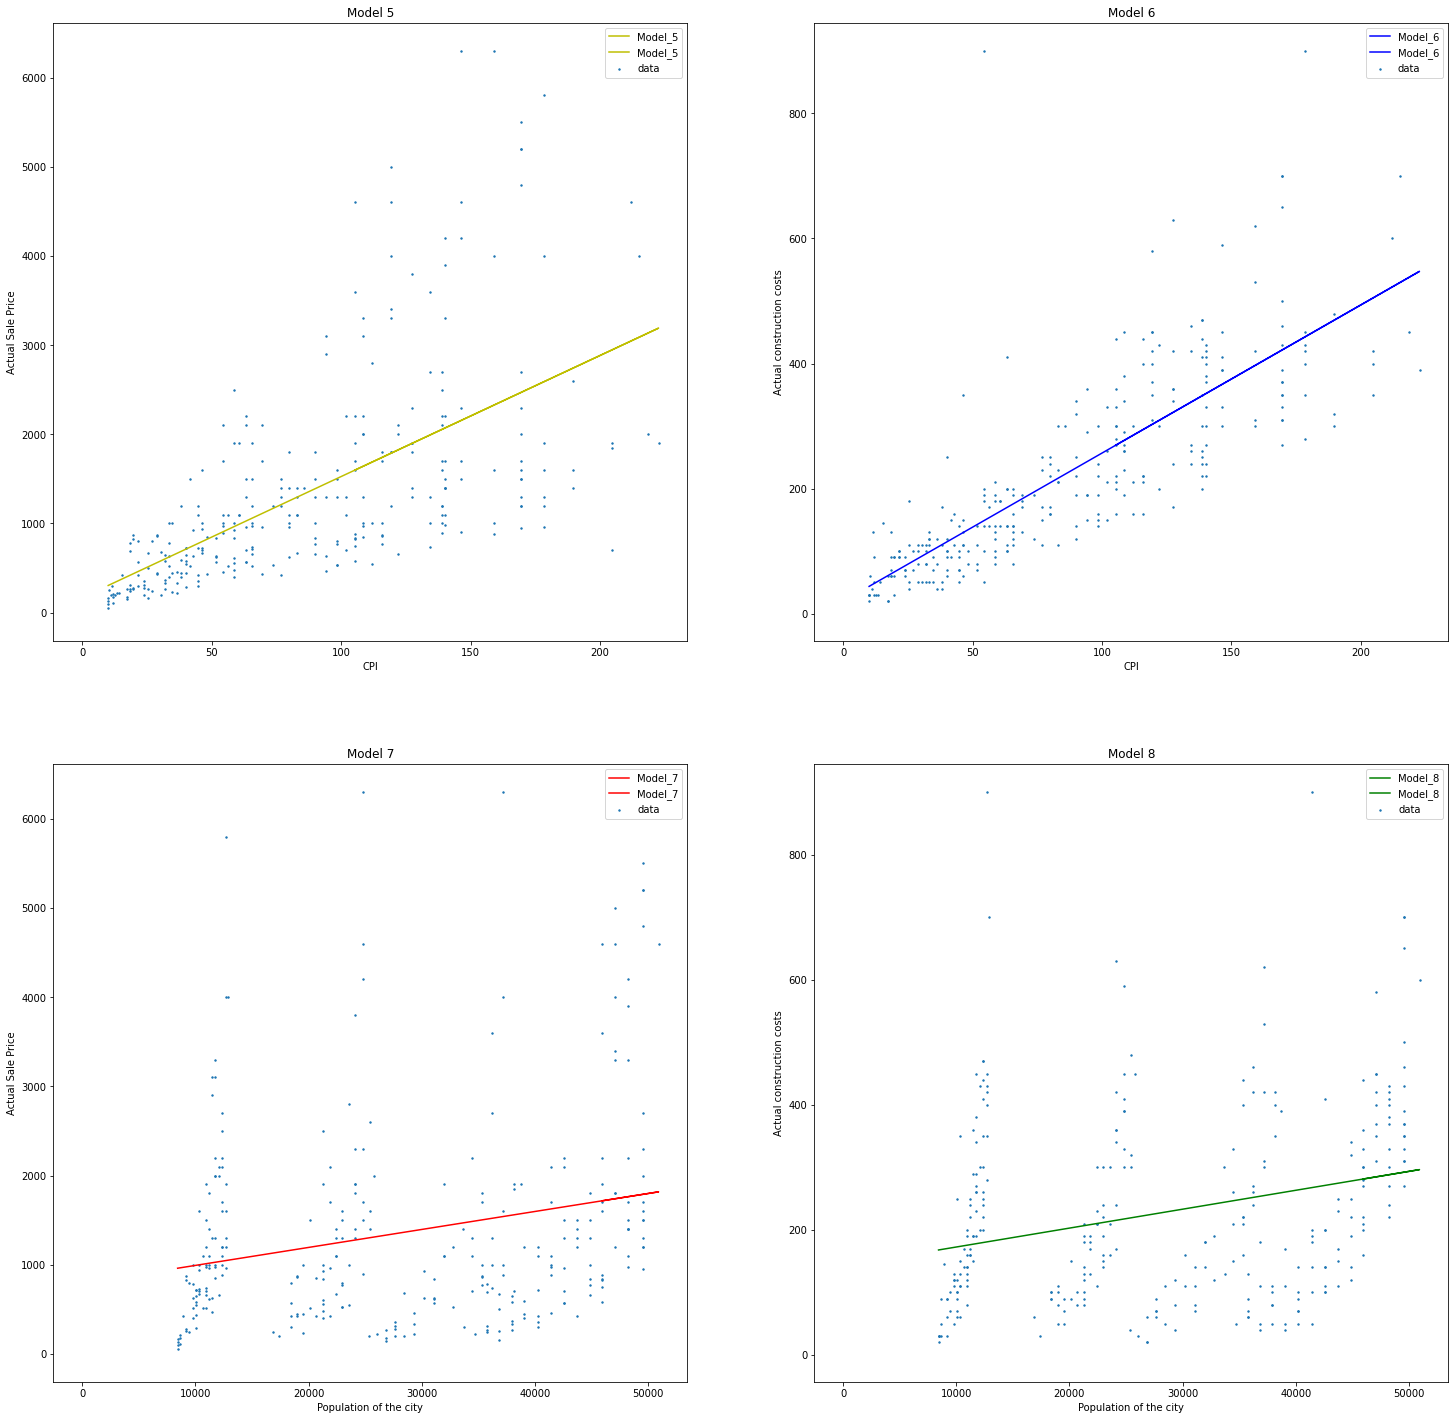

In [ ]:
fig2, axes2 = plt.subplots(2, 2, figsize = (25, 25))
# Model 5
axes2[0][0].scatter(X5, Y5, s = 2, label = 'data')
axes2[0][0].plot(X5, M5_predict,2, color = 'y', label = 'Model_5')
axes2[0][0].set(xlabel = 'CPI', ylabel = 'Actual Sale Price', title = 'Model 5')
axes2[0][0].legend()
# Model 6
axes2[0][1].scatter(X6, Y6, s = 2, label = 'data')
axes2[0][1].plot(X6, M6_predict,2, color = 'b', label = 'Model_6')
axes2[0][1].set(xlabel = 'CPI', ylabel = 'Actual construction costs', title = 'Model 6')
axes2[0][1].legend()
# Model 7
axes2[1][0].scatter(X7, Y7, s = 2, label = 'data')
axes2[1][0].plot(X7, M7_predict,2, color = 'r', label = 'Model_7')
axes2[1][0].set(xlabel = 'Population of the city', ylabel = 'Actual Sale Price', title = 'Model 7')
axes2[1][0].legend()
# Model 8
axes2[1][1].scatter(X8, Y8, s = 2, label = 'data')
axes2[1][1].plot(X8, M8_predict,2, color = 'g', label = 'Model_8')
axes2[1][1].set(xlabel = 'Population of the city', ylabel = 'Actual construction costs', title = 'Model 8')
axes2[1][1].legend()

### Cross Valitation:

### MSE of Model 1 to Model 8 for training data

In [ ]:
sample_size = len(v2_model_1)
MSE_model1 = ((Y - M1_predict)**2).sum()/sample_size
MSE_model2 = ((Y2 - M2_predict)**2).sum()/sample_size
MSE_model3 = ((Y3 - M3_predict)**2).sum()/sample_size
MSE_model4 = ((Y4 - M4_predict)**2).sum()/sample_size
MSE_model5 = ((Y5 - M5_predict)**2).sum()/sample_size
MSE_model6 = ((Y6 - M6_predict)**2).sum()/sample_size
MSE_model7 = ((Y7 - M7_predict)**2).sum()/sample_size
MSE_model8 = ((Y8 - M8_predict)**2).sum()/sample_size

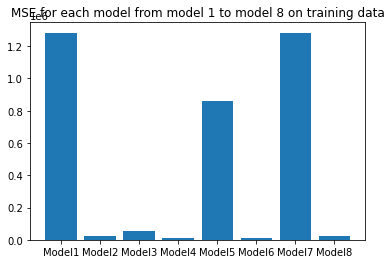

Model_1 MSE is 1279732.952332 , Model_2 MSE is 22895.045274 , 
Model_3 MSE is 53718.173649 , Model_4 MSE is 8785.591610 , 
Model_5 MSE is 857204.148619 , Model_6 MSE is 8977.676424 , 
Model_7 MSE is 1283422.968778 , Model_8 MSE is 22578.065694 , 


In [ ]:
MSE_xaxis = ['Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8']
MSE_yaxis = [MSE_model1,MSE_model2,MSE_model3,MSE_model4,MSE_model5,MSE_model6,
             MSE_model7,MSE_model8]
plt.bar(MSE_xaxis, MSE_yaxis)
plt.title('MSE for each model from model 1 to model 8 on training data')
plt.show()
print('Model_1 MSE is %f , Model_2 MSE is %f , ' % (MSE_yaxis[0],MSE_yaxis[1]))
print('Model_3 MSE is %f , Model_4 MSE is %f , ' % (MSE_yaxis[2],MSE_yaxis[3]))
print('Model_5 MSE is %f , Model_6 MSE is %f , ' % (MSE_yaxis[4],MSE_yaxis[5]))
print('Model_7 MSE is %f , Model_8 MSE is %f , ' % (MSE_yaxis[6],MSE_yaxis[7]))

### MSE of Model 1 to Model 8 for test data

In [ ]:
test_samplesize = len(df_test[:,5])
y_saleprice_test = df_test[:,9]
y_saleprice_test = y_saleprice_test.astype(np.float64)
y_constrPrice_test = df_test[:,10]
y_constrPrice_test = y_constrPrice_test.astype(np.float64)
v2_test = df_test[:,5]
v2_test = v2_test.astype(np.float64)
v8_test = df_test[:,6]
v8_test = v8_test.astype(np.float64)
v26_test = df_test[:,7]
v26_test = v26_test.astype(np.float64)
v28_test = df_test[:,8]
v28_test = v28_test.astype(np.float64)

M1_test_predict = ws[0] + ws[1] * v2_test
M2_test_predict = ws2[0] + ws2[1] * v2_test
M3_test_predict = ws3[0] + ws3[1] * v8_test
M4_test_predict = ws4[0] + ws4[1] * v8_test
M5_test_predict = ws5[0] + ws5[1] * v26_test
M6_test_predict = ws6[0] + ws6[1] * v26_test
M7_test_predict = ws7[0] + ws7[1] * v28_test
M8_test_predict = ws8[0] + ws8[1] * v28_test

In [ ]:
MSE_model1_test = ((y_saleprice_test - M1_test_predict)**2).sum()/test_samplesize
MSE_model2_test = ((y_constrPrice_test - M2_test_predict)**2).sum()/test_samplesize
MSE_model3_test = ((y_saleprice_test - M3_test_predict)**2).sum()/test_samplesize
MSE_model4_test = ((y_constrPrice_test - M4_test_predict)**2).sum()/test_samplesize
MSE_model5_test = ((y_saleprice_test - M5_test_predict)**2).sum()/test_samplesize
MSE_model6_test = ((y_constrPrice_test - M6_test_predict)**2).sum()/test_samplesize
MSE_model7_test = ((y_saleprice_test - M7_test_predict)**2).sum()/test_samplesize
MSE_model8_test = ((y_constrPrice_test - M8_test_predict)**2).sum()/test_samplesize

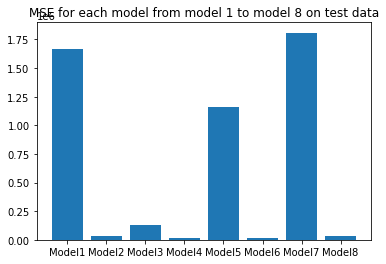

On test data, 
Model_1 test MSE is 1664187.955116 , Model_2 test MSE is 31841.665487 , 
Model_3 test MSE is 126058.035508 , Model_4 test MSE is 14490.862380 , 
Model_5 test MSE is 1158851.238397 , Model_6 test MSE is 16411.697436 , 
Model_7 test MSE is 1808619.103112 , Model_8 test MSE is 31448.577034 , 


In [ ]:
test_MSE_xaxis = ['Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8']
test_MSE_yaxis = [MSE_model1_test,MSE_model2_test,MSE_model3_test,
                  MSE_model4_test,MSE_model5_test,MSE_model6_test,
             MSE_model7_test,MSE_model8_test]
plt.bar(test_MSE_xaxis, test_MSE_yaxis)
plt.title('MSE for each model from model 1 to model 8 on test data')
plt.show()
print('On test data, ')
print('Model_1 test MSE is %f , Model_2 test MSE is %f , ' % (test_MSE_yaxis[0],test_MSE_yaxis[1]))
print('Model_3 test MSE is %f , Model_4 test MSE is %f , ' % (test_MSE_yaxis[2],test_MSE_yaxis[3]))
print('Model_5 test MSE is %f , Model_6 test MSE is %f , ' % (test_MSE_yaxis[4],test_MSE_yaxis[5]))
print('Model_7 test MSE is %f , Model_8 test MSE is %f , ' % (test_MSE_yaxis[6],test_MSE_yaxis[7]))

### Conclusion

## Multivariate linear regression

Multivariate linear regression on 2 variables in 5 of features we picked,

$Actual Sale Price = W_{0}+ W_{1}V_{26}+ W_{2}V_{28}$

### Multi-3, Chosen 3 Variables: X, Y, Z

M-31: $Price = A_{0}+ A_{1}x_{1}+ A_{2}x_{2}+ A_{3}x_{3}$

M-32: $Price = A_{0}+ A_{1}x_{1}+ A_{2}x_{2}+ A_{3}x_{3}$

In [ ]:
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

features = [XXXXXXXXX] #3-features?
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm[XXXXX]) #price?

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

In [ ]:
features = [XXXXXXXXX] # different 3-features
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm[XXXXX]) #price?

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

#### Summary of M-31 and M-32:

In [ ]:
pred = complex_model_1.predict(test_data_dm[features])
rmse = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtr = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artr = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rte = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arte = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv5 = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv5]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

#### 3D graphs of the M-3

In [ ]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_data[XXXX],train_data[XXXXX],train_data[XXXXX],c="darkgreen",alpha=.5)
ax.set(xlabel='\nXXXXX',ylabel='\nXXXXX',zlabel='\nXXXXX');

### Multi-4, Chosen 4 Variables: A,B,C,D

M-4: $Price = A_{0}+ A_{1}x_{1}+ A_{2}x_{2}+ A_{3}x_{3} + A_{4}x_{4}$

In [ ]:
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

features = [XXXXXXXXX] #4-features?
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm[XXXXX]) #price?

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

#### Summary of M-4

### Multi-5, 5 Variables: X1, X2, ...

M-5:.....

#### Summary of M-5

## Polynomial Regression

### Degree 2, All features

### Degree 2, selected features

### Degree 3, All features

### Degree 3, selected features

## Evaluation Table for All Models

## Conclusion